In [12]:
import echem as ec
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
df = ec.echem_file_loader('Example_data/bs542_004_gr_li_50ua_50mv_1v_191020_Channel_11.xlsx')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Capacity / mAh', ylabel='Voltage / V'>)

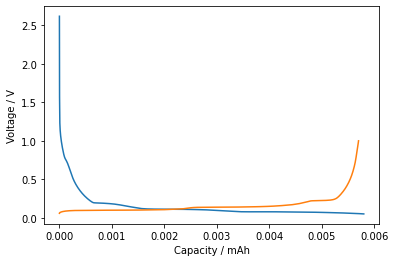

In [14]:
ec.charge_discharge_plot(df, 1)

Text(0, 0.5, 'dQ/dV / mAhV$^{-1}$')

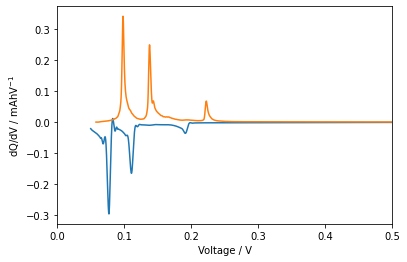

In [15]:
for cycle in [1, 2]:
    mask = df['half cycle'] == cycle
    voltage, dqdv, capacity = ec.dqdv_single_cycle(df['Capacity'][mask], df['Voltage'][mask],
                                                   window_size_1=51,
                                                    polyorder_1=5,
                                                    s_spline=0.0,
                                                    window_size_2=51,
                                                    polyorder_2=5,
                                                    final_smooth=True)
    plt.plot(voltage, dqdv)

plt.xlim(0, 0.5)
plt.xlabel('Voltage / V')
plt.ylabel('dQ/dV / mAhV$^{-1}$')